<a href="https://colab.research.google.com/github/Clever-Lazinezz/Portfolio/blob/main/Mini_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

This data anlysis will create a model to predict if a patient will return to the hospital within thirty days of their discharge. This information could be usful for measuring the effectiveness of treatments across different races, ethnicities, and genders. Further analysises should isolate data into groups based on gender and race to provide a more accurate prediction for the particular case.

## Import Libraries

In [ ]:
!pip install pydot
!pip install pydot-ng
!pip install graphviz
!pip install --upgrade scikit-Learn==0.20.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read Files

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Clever-Lazinezz/ML-Data2/main/diabetic_data.csv')

## EDA

In [ ]:
data = df

In [ ]:
data.head()

In [ ]:
data.isnull().count()

### Cleaning up Data

In [ ]:
# Chaning age ranges to the median number in the range
# This is done to create integer(or categorical) values that can be used in machine learning models
replaceDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

data['age'] = data['age'].apply(lambda x : replaceDict[x])

In [ ]:
data['age'].head()

In [ ]:
data.columns

In [ ]:
len(df)

101766

#### Checking for duplicate patients

In [ ]:
len(data['encounter_id'].unique())

101766

In [ ]:
len(data['admission_source_id'].unique())

In [ ]:
# Looks like there are duplicates
len(data['patient_nbr'].unique())

71518

In [ ]:
# dropna removes the rows that contain null values
data.dropna(inplace = True)
data.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)

In [ ]:
len(data)

#### Dropping Unwanted Data

In [ ]:
from collections import Counter

In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
# Dropping this column due to the insane amount of missing data represented as '?'
data['weight'].value_counts(dropna=False)

In [ ]:
data['encounter_id'].value_counts(dropna=False)

In [ ]:
data.drop(['weight', 'medical_specialty', 'payer_code', 'encounter_id', 'patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'race'], axis=1, inplace=True)

In [ ]:
data.columns

#### Replacing remaining objects with integer values

In [ ]:
# DONT REINVENT THE WHEEL - USE YOUR RESOURCES
# Solution by Sachin Ranveer
# Functions could be written in a seperate cell, and then called by name for the apply method
data['discharge_disposition_id'] = data['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9, 13] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 11 if int(x) in [19, 20, 21]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) )))))

data = data[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

data['admission_type_id'] = data['admission_type_id'].apply(lambda x : 1 if int(x) in [2, 7]
                                                            else ( 5 if int(x) in [6, 8]
                                                            else int(x) ))

data['admission_source_id'] = data['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))

for col in ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]:
    data[col] = data[col].apply(lambda x : 10 if x == 'Up' 
                                              else ( -10 if x == 'Down'                                                          
                                              else ( 0 if x == 'Steady'
                                              else  -20)))


data['change'] = data['change'].apply(lambda x : 1 if x == 'Ch'
                                                 else -1)


data['diabetesMed'] = data['diabetesMed'].apply(lambda x : -1 if x == 'No'
                                                else 1)


data['max_glu_serum'] = data['max_glu_serum'].apply(lambda x : 200 if x == '>200' 
                                                            else ( 300 if x == '>300'                                                          
                                                            else ( 100 if x == 'Norm'
                                                            else  0)))

data['A1Cresult'] = data['A1Cresult'].apply(lambda x : 7 if x == '>7' 
                                                         else (8 if  x == '>8'                                                        
                                                         else ( 5 if x == 'Norm'
                                                          else  0)))

In [ ]:
data['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [ ]:
# Alternate way of doing the following cell's operations
# MISSING STEP - CONVERTING TYPE TO INT(this method still leaves values as objects)
"""
data['readmitted'] = data['readmitted'].replace(['NO'],0)
data['readmitted'] = data['readmitted'].replace(['>30'],45)
data['readmitted'] = data['readmitted'].replace(['<30'],15)
"""

In [ ]:
# Note how parenthesises are placed...
data['readmitted'] = data['readmitted'].apply(lambda x : 1 if x == '<30'
                                                        else 0)

In [ ]:
data.head()

In [ ]:
data['readmitted']

In [ ]:
data['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [ ]:
data['gender'].value_counts(dropna=False)

In [ ]:
data = data[data['gender'] != 'Unknown/Invalid']

In [ ]:
data['gender'].value_counts(dropna=False)

In [ ]:
data['gender'] = data['gender'].apply(lambda x : 1 if x == 'Female' else 0)

In [ ]:
data['gender']

In [ ]:
# Data is all numerical values and ready to be used in machine learning models
data.info()

## Data Visulaization

In [ ]:
df.head()

In [ ]:
data.head()

In [ ]:
data.columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


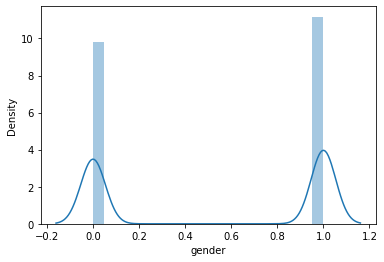

In [ ]:
# Checking to see if there is an overwhelming majority of either gender
sns.distplot(data['gender'])

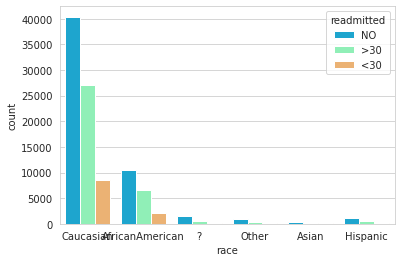

In [ ]:
# Most of the data is of Caucasians 
# African Americans and Caucasians have a similar readmittance pattern
sns.set_style('whitegrid')
sns.countplot(x='race', hue='readmitted', data=df, palette='rainbow')

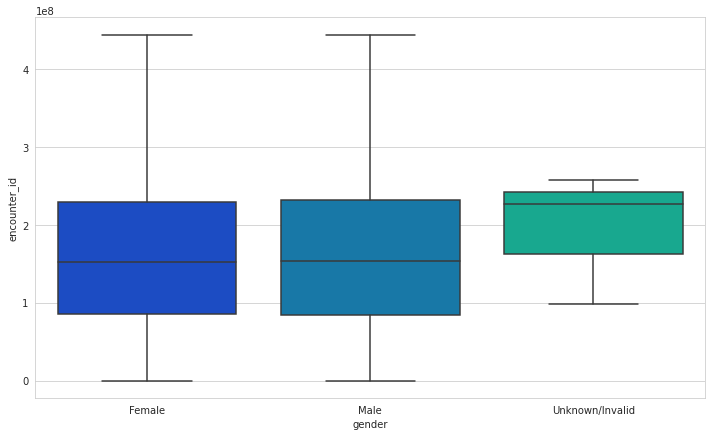

In [ ]:
# Checking for the relations between encounter id and gender
# Both genders seem to have insignificant fluctuations in encount id classification
plt.figure(figsize=(12,7))
sns.boxplot(x='gender', y='encounter_id', data=df, palette='winter')

## Training Test Split and Analysises

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
data.tail()

In [ ]:
X = data.drop("readmitted", axis=1)
y = data["readmitted"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.55, random_state = 0)

### Decision Tree - Supervised

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

In [ ]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     35275
           1       0.11      0.14      0.12      3463

   micro avg       0.83      0.83      0.83     38738
   macro avg       0.51      0.51      0.51     38738
weighted avg       0.84      0.83      0.83     38738



In [ ]:
print(confusion_matrix(y_test, predictions))

[[31507  3768]
 [ 2991   472]]


### Logistic Regression - Supervised

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     35275
           1       0.34      0.00      0.01      3463

   micro avg       0.91      0.91      0.91     38738
   macro avg       0.63      0.50      0.48     38738
weighted avg       0.86      0.91      0.87     38738



In [ ]:
print(confusion_matrix(y_test, predictions))

[[35250    25]
 [ 3450    13]]


### KNN - Unsupervised

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df1 = data
scaler = StandardScaler()

In [ ]:
scaler.fit(df1.drop('readmitted', axis=1))
scaled_features = scaler.transform(df1.drop('readmitted', axis=1))
df_feat = pd.DataFrame(scaled_features, columns = df1.columns[:-1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df1['readmitted'], test_size = 0.25, random_state = 0)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     16037
           1       0.10      0.10      0.10      1571

   micro avg       0.84      0.84      0.84     17608
   macro avg       0.51      0.51      0.51     17608
weighted avg       0.84      0.84      0.84     17608

[[14608  1429]
 [ 1411   160]]


## Conclusion

Unfortunately due to technical difficulties, I am unable to recieve a complete accuracy report. However, I believe that my logistic model with have the highest accuracy. Logistic regression is great for multi class predictions, and less prone to overfitting. My one concern is that it assumes linearity bewteen input and outputs. In future logistic regressions models, I will consider decreasing the amount of categories I pull data from.